## Objective

The objective of this project is to build a forecasting system to predict demand of products at a retail outlet based on historical data.

## Dataset-https://www.kaggle.com/competitions/rossmann-store-sales/data

### Dataset Description

train.csv - historical data including Sales

store.csv - supplemental information about the stores

#### Problem statement
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

### Importing the Relevant Libraries

In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

## Data Inspection

In [2]:
#Reading the dataset to the python environment
train=pd.read_csv('train.csv')
store=pd.read_csv('store.csv')
# first glance at the train set: head and tail
print("Shape of the train data set: ", train.shape)
print("Shape of the store data set: ", store.shape)
#displaying  top 5  rows & last 5 rows of the dataset
train

Shape of the train data set:  (1017209, 9)
Shape of the store data set:  (1115, 10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [4]:
#To know data types of each columns and checking for null values in the columns
train.info(),store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

(None, None)

### Short description of train dataset :

    Sales: the turnover for any given day (target variable).
    Customers: the number of customers on a given day.
    Open: an indicator for whether the store was open: 0 = closed, 1 = open.
    Promo: indicates whether a store is running a promo on that day.
    StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
    SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

### Short description of store dataset :



    Store: a unique Id for each store
    StoreType: differentiates between 4 different store models: a, b, c, d
    Assortment: describes an assortment level: a = basic, b = extra, c = extended
    CompetitionDistance: distance in meters to the nearest competitor store
    CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
    Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
    Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
    PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



In [5]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
train.isnull().sum(),store.isnull().sum()

(Store            0
 DayOfWeek        0
 Date             0
 Sales            0
 Customers        0
 Open             0
 Promo            0
 StateHoliday     0
 SchoolHoliday    0
 dtype: int64,
 Store                          0
 StoreType                      0
 Assortment                     0
 CompetitionDistance            3
 CompetitionOpenSinceMonth    354
 CompetitionOpenSinceYear     354
 Promo2                         0
 Promo2SinceWeek              544
 Promo2SinceYear              544
 PromoInterval                544
 dtype: int64)

In [6]:
store.isnull().sum()/store.shape[0] *100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

 
Data contains features with NAN values

    CompetitionDistance
    CompetitionOpenSinceMonth
    CompetitionOpenSinceYear
    Promo2SinceWeek
    Promo2SinceYear
    PromoInterval

In [7]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Merging 2 csv files

### merged “train.csv” and “store.csv” by “Store”because we can predict daily sales better with more data related to the sales

**We can see that both the tables have different number of records, but the Store ID can be used to join two csv files**

In [8]:
#test_store_joined = pd.merge(test, store, on='Store', how='inner')
data = pd.merge(train, store, on='Store', how='inner')
print("\nShape of the  data set: ", data.shape)
data


Shape of the  data set:  (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [9]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**CompetitionSinceMonth, CompetitionSinceYear, Promo2SinceWeek and Promo2SinceYear column have integer values but are represented as float. We can change that.**

In [10]:
#converting datype of DATE to datetime datatype
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
#ratio of null values
data.isnull().sum()/data.shape[0] *100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

In [12]:
#Summary Statistics
data.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-06-09 00:00:00,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN


<div class="alert alert-block alert-info"><b>About our Dataset:</b><br>  <strong> <br>
    
    
We can observe sales=0 as the minimum number of sales, this indicates that there are stores which might just have opened or started.<br>
    
or there can be days when the store is not open, so the sales are recorded as zero.
 

    
</div>

In [13]:
#categorical features
categorical = data.select_dtypes(include =[np.object])
print("Categorical Features in data Set:",categorical.shape[1])

#numerical features
numerical= data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in data Set:",numerical.shape[1])

Categorical Features in data Set: 4
Numerical Features in data Set: 13


In [14]:
#to know count of unique value in each coumn
unique_data= [] 
for x in data.columns.tolist():
    num= data[x].nunique()
    value= data[x].unique()
    unique_data.append(pd.Series({'col_name' : x,
               'num_unique' : num,
               'value_unique': value}))
uniques = pd.concat(unique_data,axis=1).T.set_index('col_name')
uniques.sort_values('num_unique')

,num_unique,value_unique
col_name,,
SchoolHoliday,2,"[1, 0]"
Promo2,2,"[0, 1]"
Promo,2,"[1, 0]"
Open,2,"[1, 0]"
Assortment,3,"[a, c, b]"
PromoInterval,3,"[nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju..."
StoreType,4,"[c, a, d, b]"
StateHoliday,5,"[0, a, b, c, 0]"
Promo2SinceYear,7,"[nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ..."


In [15]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Exploratory Data Analysis

In [16]:
data['Date'].min(),data['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

**Datset have information of 2.5 years of  Rossmann Store Sales data**

#### We are dealing with time series data so it will probably serve us to extract dates for further analysis. We also have two likely correlated vaiables in the dataset, which can be combined into a new feature.

In [17]:
# Extracting the Day, Month, Year from the Date Column.
data.Date = pd.to_datetime(data.Date)
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data['WeekOfYear'] = data.Date.dt.weekofyear

In [18]:
# adding new variable
data['SalePerCustomer'] = data['Sales']/data['Customers']
data['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

<div class="alert alert-block alert-info"><b>About our Dataset:</b><br>  <strong> <br>
    
    
On average customers spend about 9.50$ per day. Though there are days with Sales equal to zero.
 

    
</div>

We may drop the date column if we want, because it's function is being fulfilled by the three colums we just created.so Assining the date as index

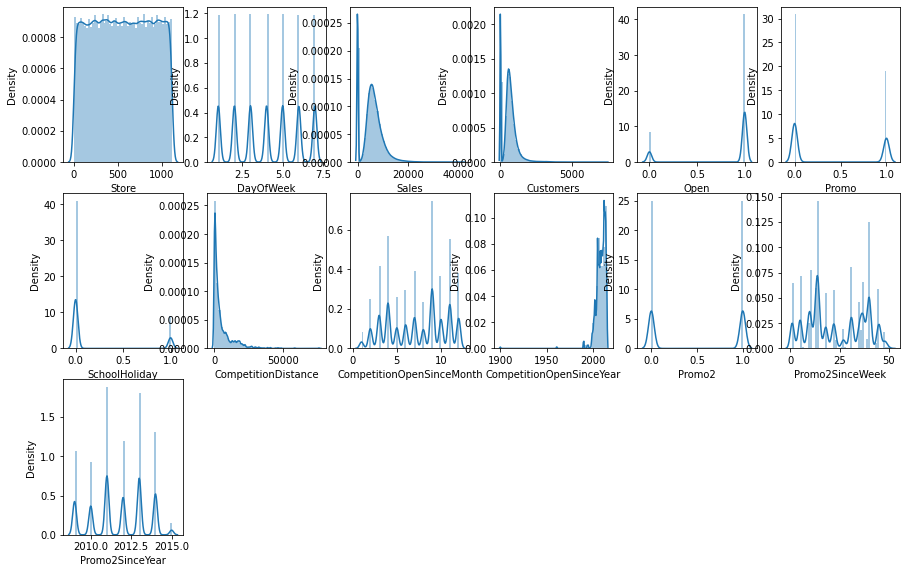

In [19]:
# Distribution plots of all columns
l = numerical.columns.values
plt.figure(figsize=(15,20))
for i in range(0,len(l)):
    plt.subplot(6,6,i+1)
    sns.distplot(data[l[i]],kde=True) 


ECDF: empirical cumulative distribution function

To get the first impression about continious variables in the data we can plot ECDF.


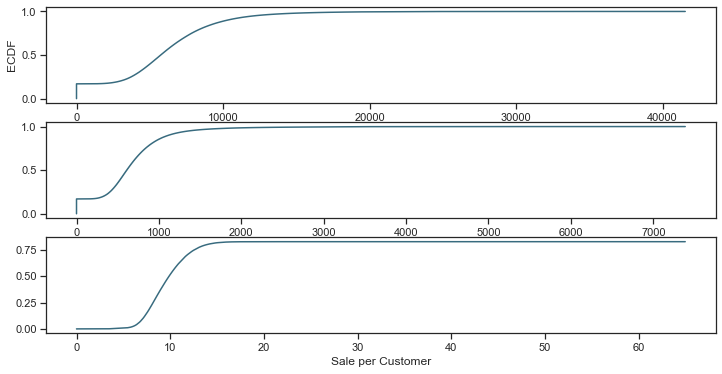

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF

sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(data['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(data['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(data['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');



 data has zero amount of sales/customers that we need to deal with 

### Sales

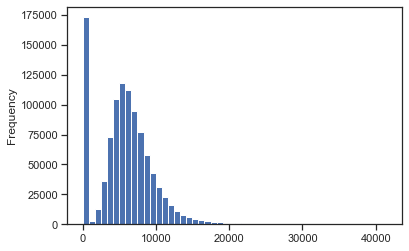

In [21]:
data.Sales.plot(kind='hist', bins=50);

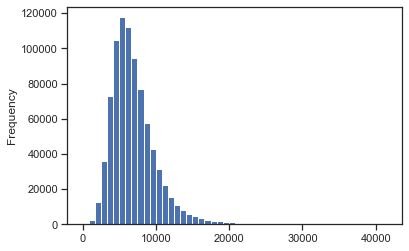

In [22]:
# If the store is close then sale will be zero, hence filtering the closed stores
data[(data.Open!=0)]['Sales'].plot(kind='hist', bins=50);

In [23]:
# closed stores
data[(data.Open == 0) & (data.Sales == 0)]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,SalePerCustomer
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,26,30,NaN
12,1,7,2015-07-19,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,19,29,NaN
19,1,7,2015-07-12,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,12,28,NaN
26,1,7,2015-07-05,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,5,27,NaN
33,1,7,2015-06-28,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,6,28,26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017182,1115,7,2013-01-27,0,0,0,0,0,0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,27,4,NaN
1017189,1115,7,2013-01-20,0,0,0,0,0,0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,20,3,NaN
1017196,1115,7,2013-01-13,0,0,0,0,0,0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,13,2,NaN
1017203,1115,7,2013-01-06,0,0,0,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,6,1,NaN


There're 172817 closed stores in the data. It is about 10% of the total amount of observations. To avoid any biased forecasts we will drop these values.

In [24]:
# opened stores with zero sales
zero_sales = data[(data.Open != 0) & (data.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 23)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,SalePerCustomer
22589,25,4,2014-02-13,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,NaN,NaN,NaN,2014,2,13,7,NaN
22590,25,3,2014-02-12,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,NaN,NaN,NaN,2014,2,12,7,NaN
25212,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,9,4,36,NaN
25213,28,3,2014-09-03,0,0,1,1,0,1,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,9,3,36,NaN
25214,28,2,2014-09-02,0,0,1,1,0,1,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,9,2,36,NaN


here are opened store with no sales on working days. There're only 54 days in the data, 

In [25]:
print ()
print ("-Over those two years, {} is the number of times that different stores closed on given days.".format(data[(data.Open == 0)].count()[0]))
print ()
print ("-From those closed events, {} times occured because there was a school holiday. " .format(data[(data.Open == 0) & (data.SchoolHoliday == 1)&(data.StateHoliday == '0') ].count()[0]))
print ()
print ("-And {} times it occured because of either a bank holiday or easter or christmas.".format(data[(data.Open == 0) &
         ((data.StateHoliday == 'a') |
          (data.StateHoliday == 'b') | 
          (data.StateHoliday == 'c'))].count()[0]))
print ()
print ("-But interestingly enough, {} times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.".format(data[(data.Open == 0) &
         (data.StateHoliday == "0")
         &(data.SchoolHoliday == 0)].count()[0]))
print ()


-Over those two years, 172817 is the number of times that different stores closed on given days.

-From those closed events, 2263 times occured because there was a school holiday. 

-And 30140 times it occured because of either a bank holiday or easter or christmas.

-But interestingly enough, 121482 times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.



### Closed stores and days which didn't have any sales won't be counted into the forecasts,so droping them

In [26]:
data = data[(data["Open"] != 0) & (data['Sales'] != 0)]

print("In total: ", data.shape)

In total:  (844338, 23)


## Customer

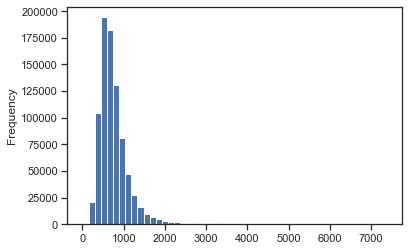

In [27]:
data.Customers.plot(kind='hist', bins=50);

<AxesSubplot:xlabel='Year', ylabel='Customers'>

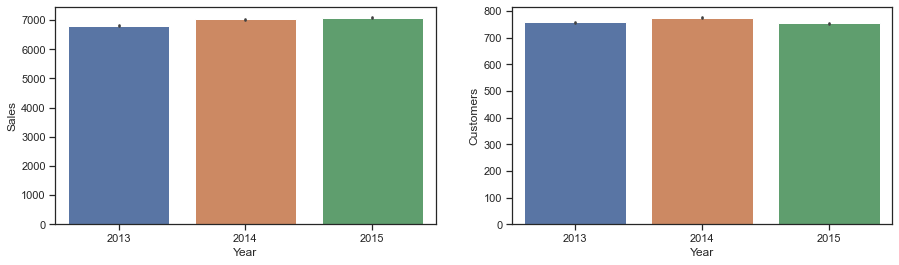

In [28]:
# Plot average sales & customers for every year
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Year', y='Sales', data=data, ax=axis1)
sns.barplot(x='Year', y='Customers', data=data, ax=axis2)

# Drop Date column

#data.drop(['Date'], axis=1,inplace=True)

In [29]:
data[(data.Customers==0)].shape

(0, 23)

## Observations

    There are no records with customer counts as 0
  



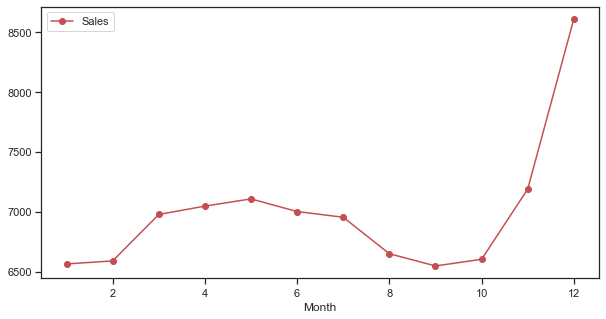

In [30]:
axis = data.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')

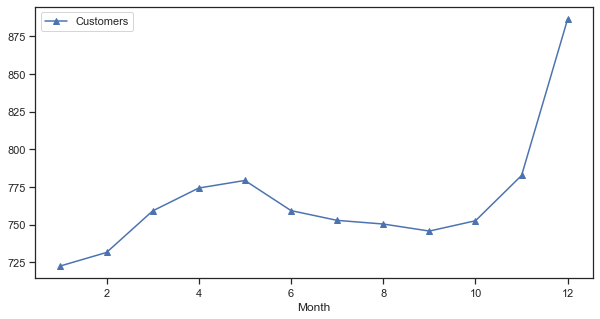

In [31]:
axis = data.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')


### Store types

 we will  look at different levels of StoreType and how the main metric Sales is distributed among them.

<AxesSubplot:>

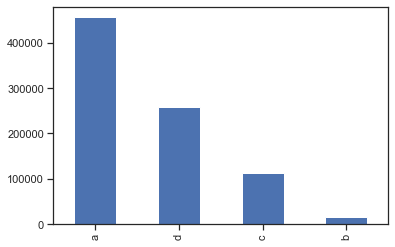

In [32]:
# Different kind of store model
data['StoreType'].value_counts().plot(kind='bar')

There are 4 type of model.There are very less no of data for store b

In [33]:
data.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


**StoreType B has the highest average of Sales among all others**

In [34]:
data.groupby(by='StoreType')['SalePerCustomer'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,8.846296,1.690913,3.635389,7.611945,8.631363,9.899438,29.877551
b,15560.0,5.133427,1.253988,2.749075,4.039561,4.987022,6.108760,9.203528
c,112968.0,8.626227,1.694325,3.382542,7.416985,8.424736,9.643063,64.957854
d,258768.0,11.277862,1.990706,4.881279,9.873309,11.194977,12.560328,57.614983


In [35]:
data.groupby('StoreType')['Customers', 'Sales'].sum()


,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


 stores of type A is the most selling and crowded one,storeType D goes on the second place in both Sales and Customers

### Timelines

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

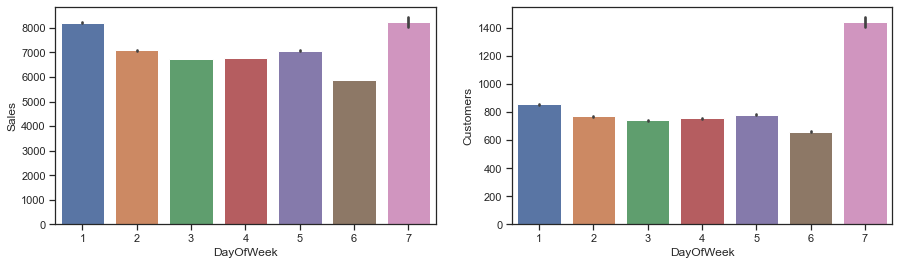

In [36]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=data, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=data, order=[1,2,3,4,5,6,7], ax=axis2)

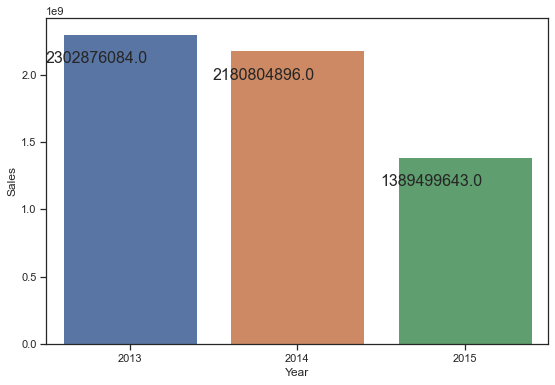

In [37]:
sale_year_timeline=data.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(9,6))
ax=sns.barplot(sale_year_timeline.Year,sale_year_timeline.Sales)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)

We can see a trend of fall in sales over the years

### Assortment

<AxesSubplot:xlabel='Assortment', ylabel='Customers'>

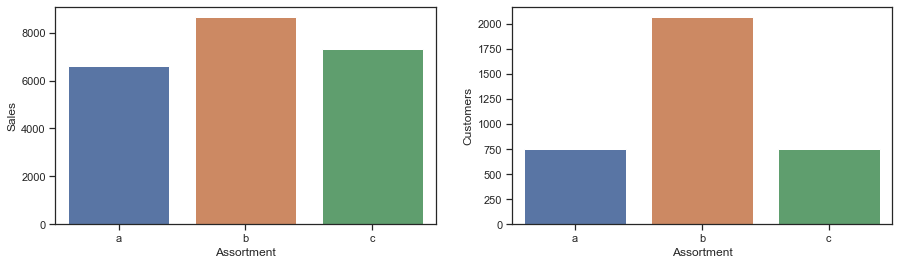

In [38]:
average_assortment = data.groupby('Assortment')['Sales', 'Customers'].mean()
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(average_assortment.index, average_assortment['Sales'], ax=axis1)
sns.barplot(average_assortment.index, average_assortment['Customers'], ax=axis2)

<AxesSubplot:xlabel='Assortment', ylabel='Customers'>

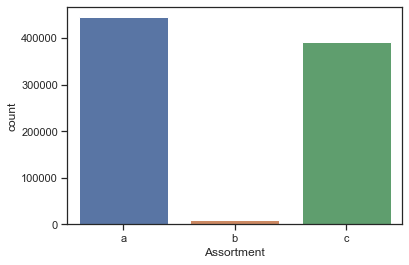

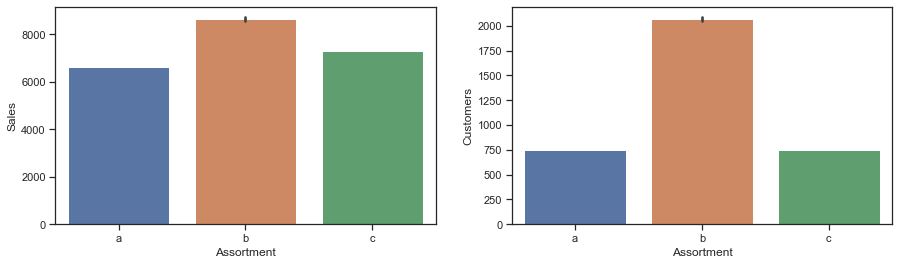

In [39]:
# Assortment 

# Plot Assortment, & Assortment Vs average sales and customers

sns.countplot(x='Assortment', data=data, order=['a','b','c'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=data, order=['a','b','c'], ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=data, order=['a','b','c'], ax=axis2)

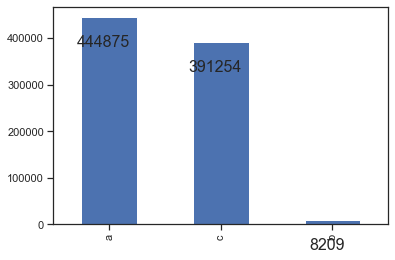

In [40]:
#Assortment 
ax=data['Assortment'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)


In [41]:
data[['Assortment','Sales','Customers']].groupby('Assortment').sum()

,Sales,Customers
Assortment,,
a,2945750070,332766935
b,70946312,16972520
c,2856484241,294302292


In assortment also b is so low in compare to a and c.

### state_holidays

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

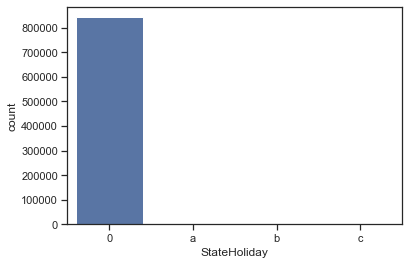

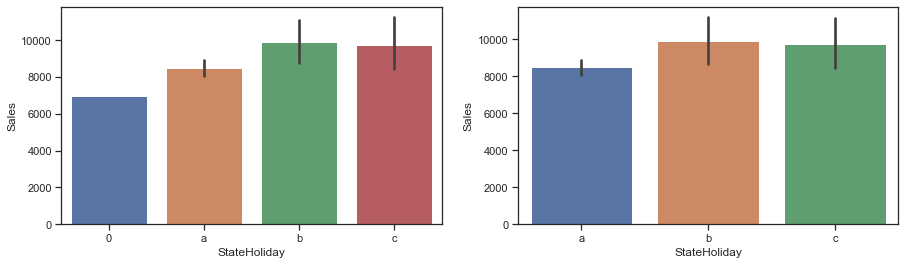

In [42]:
# StateHoliday column has values 0 & "0", So, we need to merge values with 0 to "0"
data["StateHoliday"].loc[data["StateHoliday"] == 0] = "0"

# Plot
sns.countplot(x='StateHoliday', data=data)

# Before
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=data, ax=axis1)

mask = (data["StateHoliday"] != "0") & (data["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=data[mask], ax=axis2)

In [43]:
# fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StateHoliday', y='Sales', data=data, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data=data, ax=axis2)

<AxesSubplot:xlabel='StateHoliday', ylabel='Customers'>

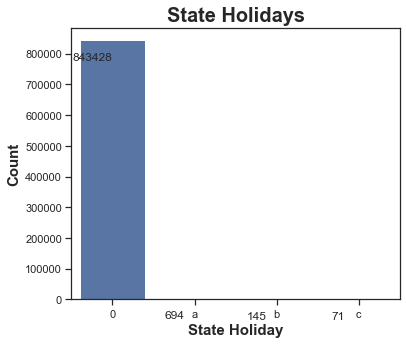

In [44]:
# state_holiday
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
ax = sns.countplot(data['StateHoliday'])
ax.set_xlabel('State Holiday',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("State Holidays",fontsize=20,fontdict={"weight": "bold"})
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',  (p.get_x()+0.155, p.get_height()), ha='center', va='top', size=12)

state_holiday has three holidays in this data set :-

    a = public holiday
    b = Easter holiday
    c = Christmas

Majority of Stores are closed on state holidays.

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Customers'>

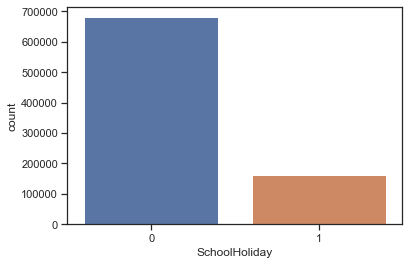

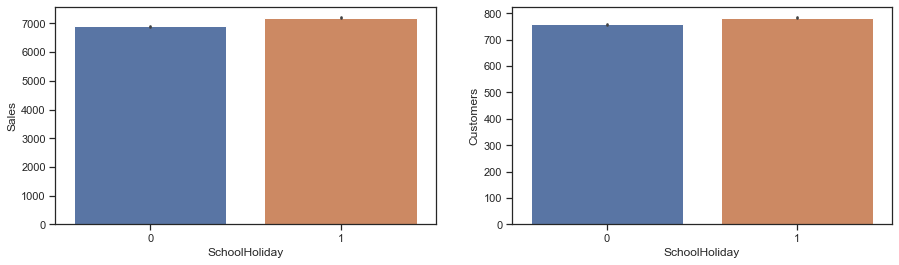

In [45]:
# SchoolHoliday
# Plot
sns.countplot(x='SchoolHoliday', data=data)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='SchoolHoliday', y='Sales', data=data, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data=data, ax=axis2)

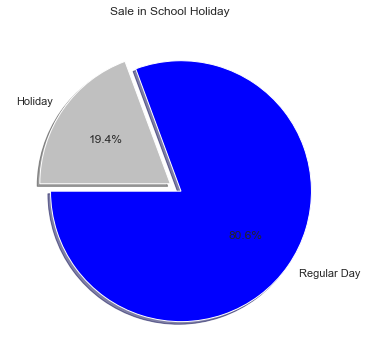

In [46]:
# Plotting pie chart
plt.figure(figsize=(12,6)) 
plt.pie(data["SchoolHoliday"].value_counts(), explode=(0.1,0.0), labels=["Regular Day", "Holiday"], colors=["blue", "silver"],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Sale in School Holiday")
plt.show()

### StoreType

<AxesSubplot:xlabel='StoreType', ylabel='Customers'>

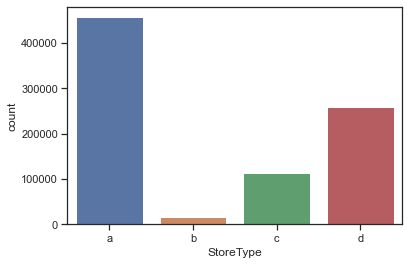

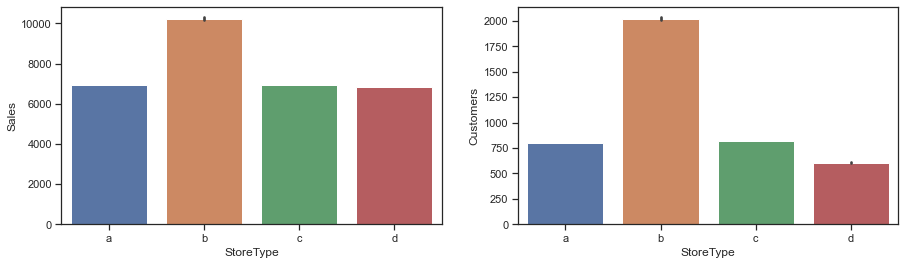

In [47]:
# StoreType 
# Plot StoreType, & StoreType Vs average sales and customers
sns.countplot(x='StoreType', data=data, order=['a','b','c', 'd'])
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=data, order=['a','b','c', 'd'],ax=axis1)
sns.barplot(x='StoreType', y='Customers', data=data, order=['a','b','c', 'd'], ax=axis2)

### Effect of Promotion on sales

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

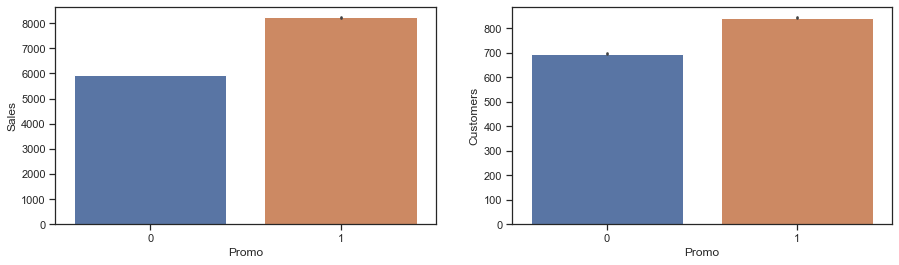

In [48]:
# Promo
# Plot average sales & customers with/without promo
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='Promo', y='Sales', data=data, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=data, ax=axis2)

In [49]:
### Promo2 

<AxesSubplot:xlabel='Promo2', ylabel='Customers'>

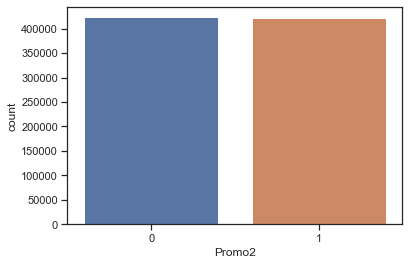

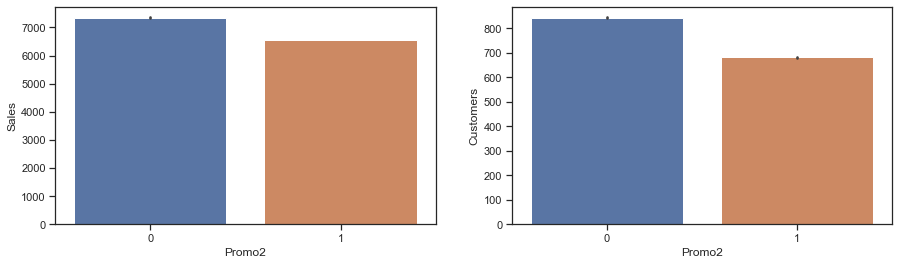

In [50]:
# Promo2
# Plot Promo2, & Promo2 Vs average sales and customers
sns.countplot(x='Promo2', data=data)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='Promo2', y='Sales', data=data, ax=axis1)
sns.barplot(x='Promo2', y='Customers', data=data, ax=axis2)

Text(0.5, 1.0, 'Effect of sales after second promotion')

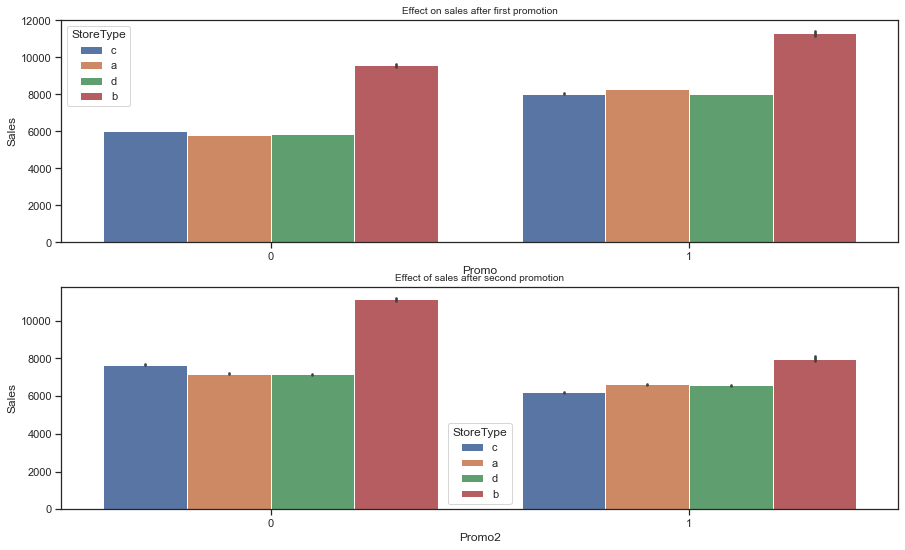

In [51]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15,9)
sns.barplot(x= "Promo", y= "Sales", data=data ,hue="StoreType", ax=axes[0])
axes[0].set_title('Effect on sales after first promotion', fontsize=10)

sns.barplot(x= "Promo2", y= "Sales", data=data ,hue="StoreType", ax=axes[1])
axes[1].set_title('Effect of sales after second promotion', fontsize=10)

### sales trends

### Average sales and number of customers per Day

Text(0.5, 0, 'day')

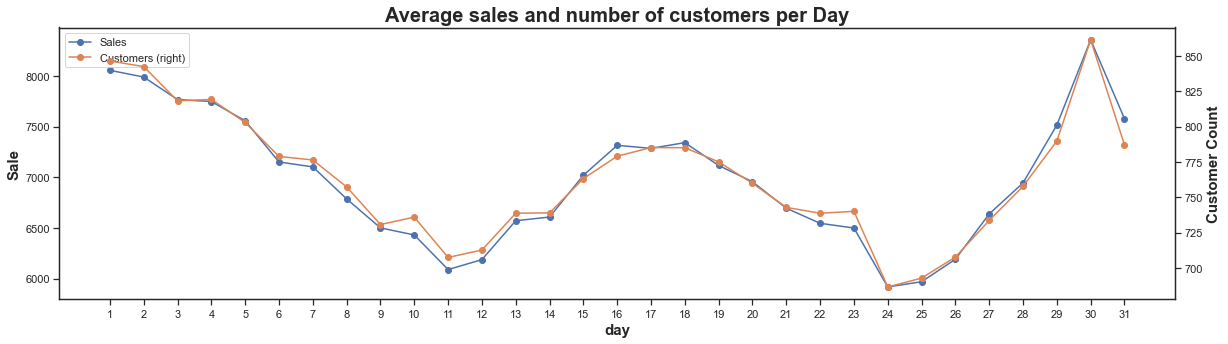

In [52]:
ax = data.groupby('Day')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,5), marker='o')
ax.set_ylabel('Sale',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer Count',size=15,fontdict={"weight": "bold"})
ax.set_xticks(range(1,32))
plt.title('Average sales and number of customers per Day',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('day',size=15,fontdict={"weight": "bold"})

The graph above shows that stores do sell more at the beginning of the month.

### sales per week of the year

Text(0.5, 0, 'Week Of Year')

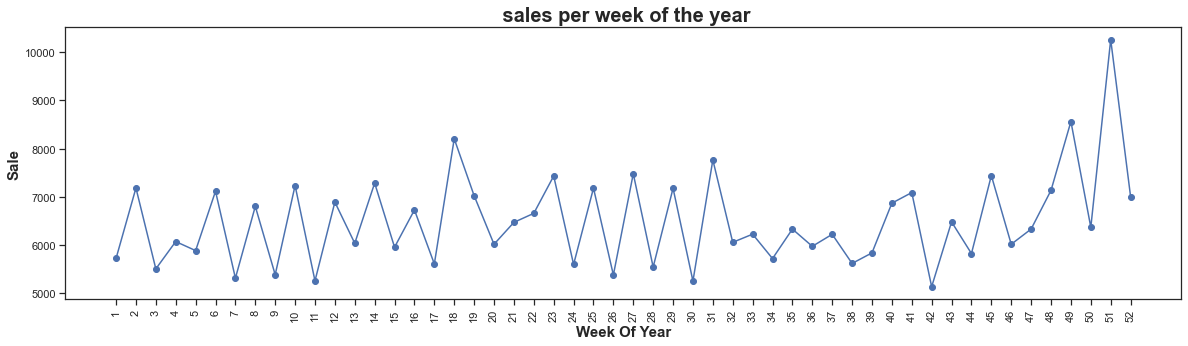

In [53]:
data.groupby('WeekOfYear')['Sales'].median().plot(figsize=(20,5), xticks=np.arange(1,53), rot=90,marker='o')
plt.title(' sales per week of the year',size=20,fontdict={"weight": "bold"})
plt.ylabel('Sale',size=15,fontdict={"weight": "bold"})
plt.xlabel('Week Of Year',size=15,fontdict={"weight": "bold"})

 Christmas and New Year lead to increase in sales.

### sales trends per store type & per promo in the store

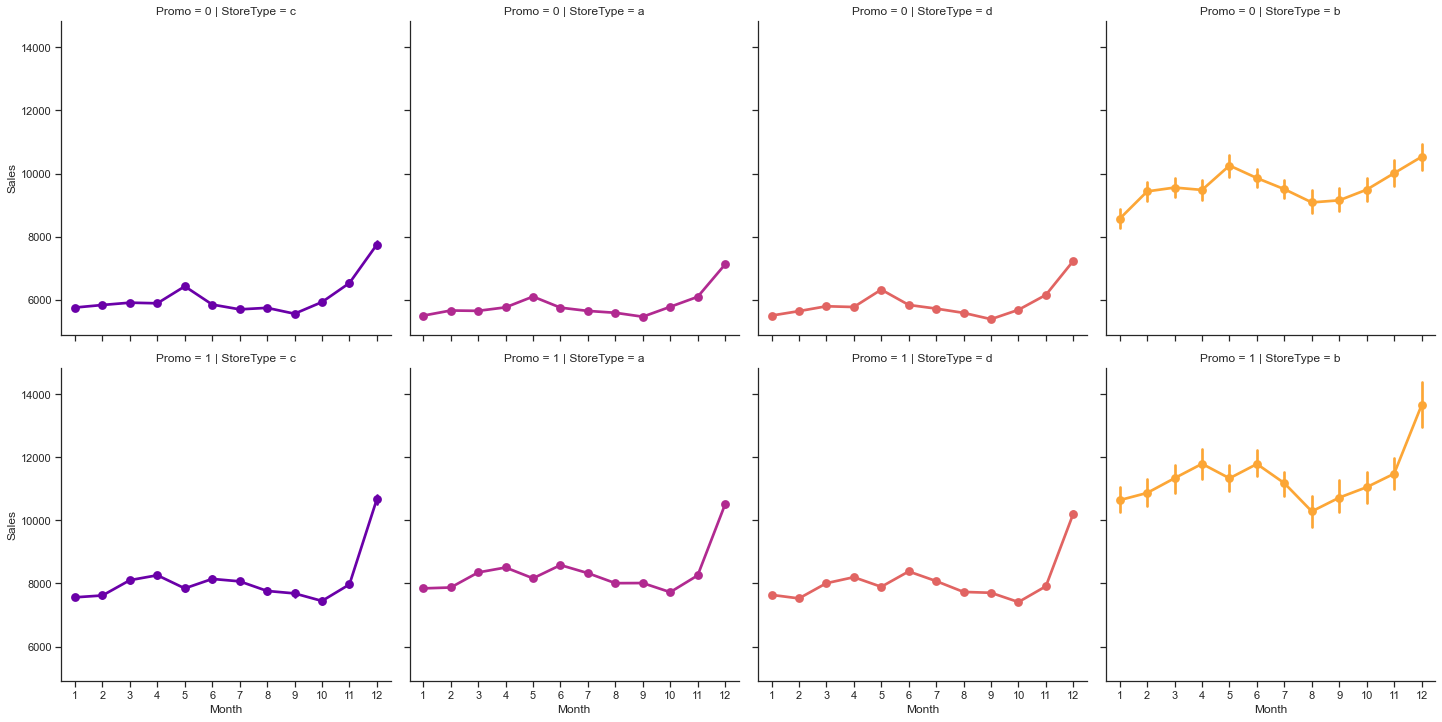

In [54]:
# sales trends
sns.factorplot(data = data, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

### customer trends per store type & per promo in the store

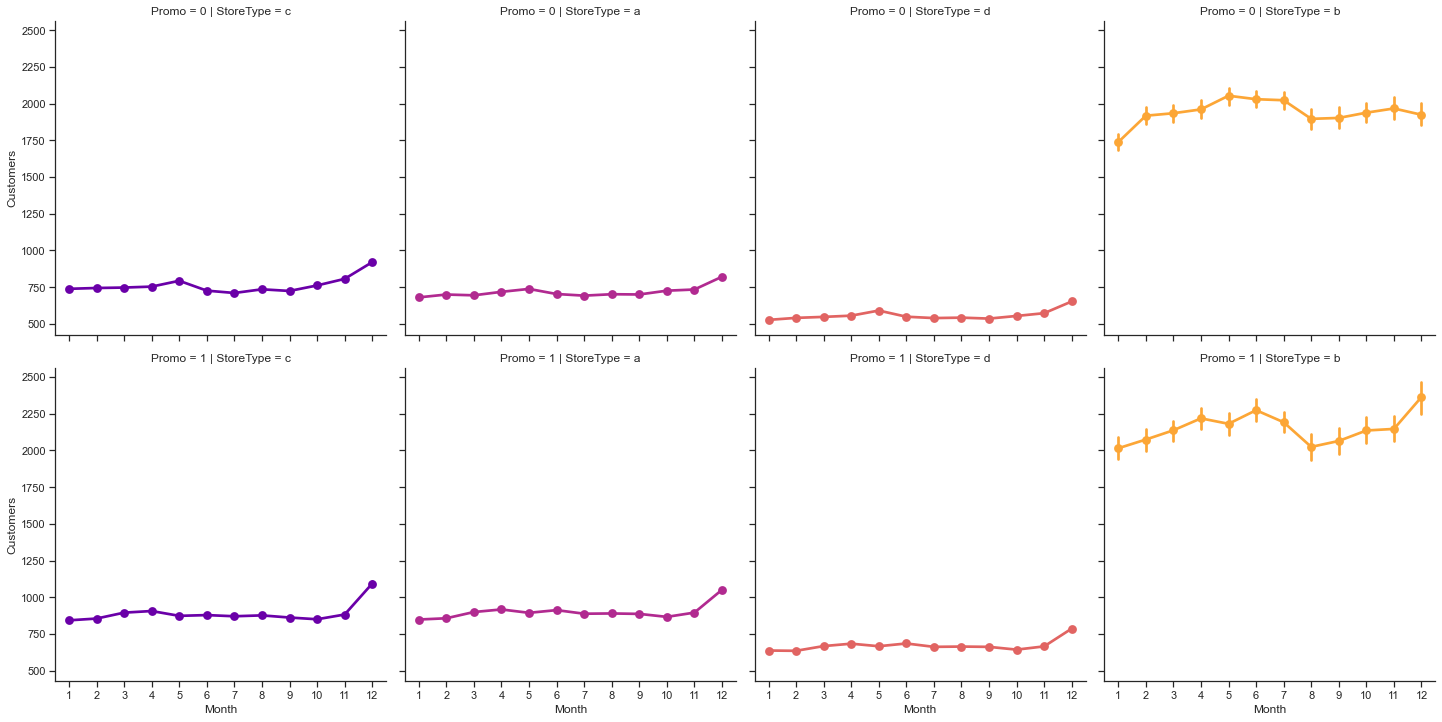

In [55]:
# customer trends
sns.factorplot(data = data, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

All store types follow the same trend but at different scales depending on the presence of the promotion and StoreType itself .

we can see that Sales escalate towards Christmas holidays.

### sale per customer trends

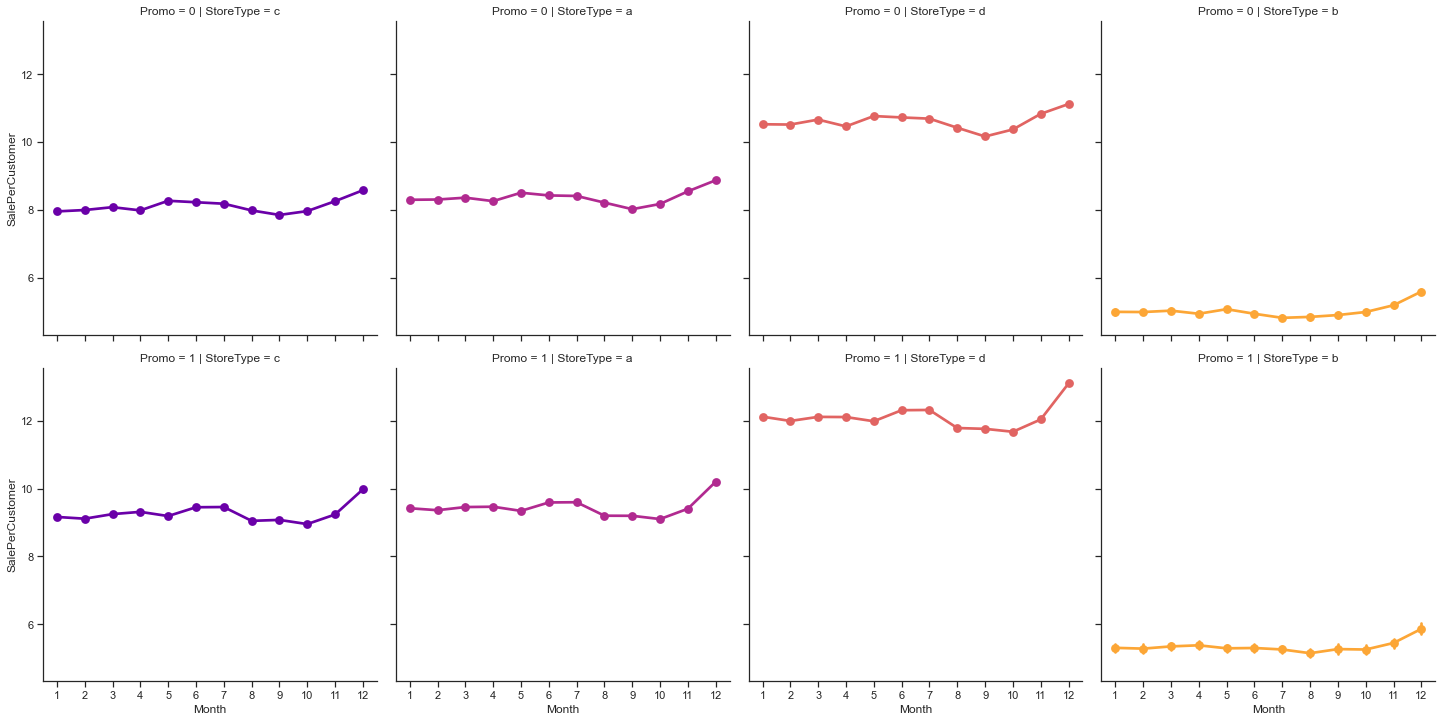

In [56]:
# sale per customer trends
sns.factorplot(data = data, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c) 

Eventhough the plots above showed StoreType B as the most selling  one. The highest SalePerCustomer amount is observed at the StoreType D, about 12€ with Promo and 10€ without. As for StoreType A and C it is about 9€.

Low SalePerCustomer amount for StoreType B describes its customers: there are a lot of people who shop essentially for "small" things (or in a little quantity). 

### customers per store type in each day of week 

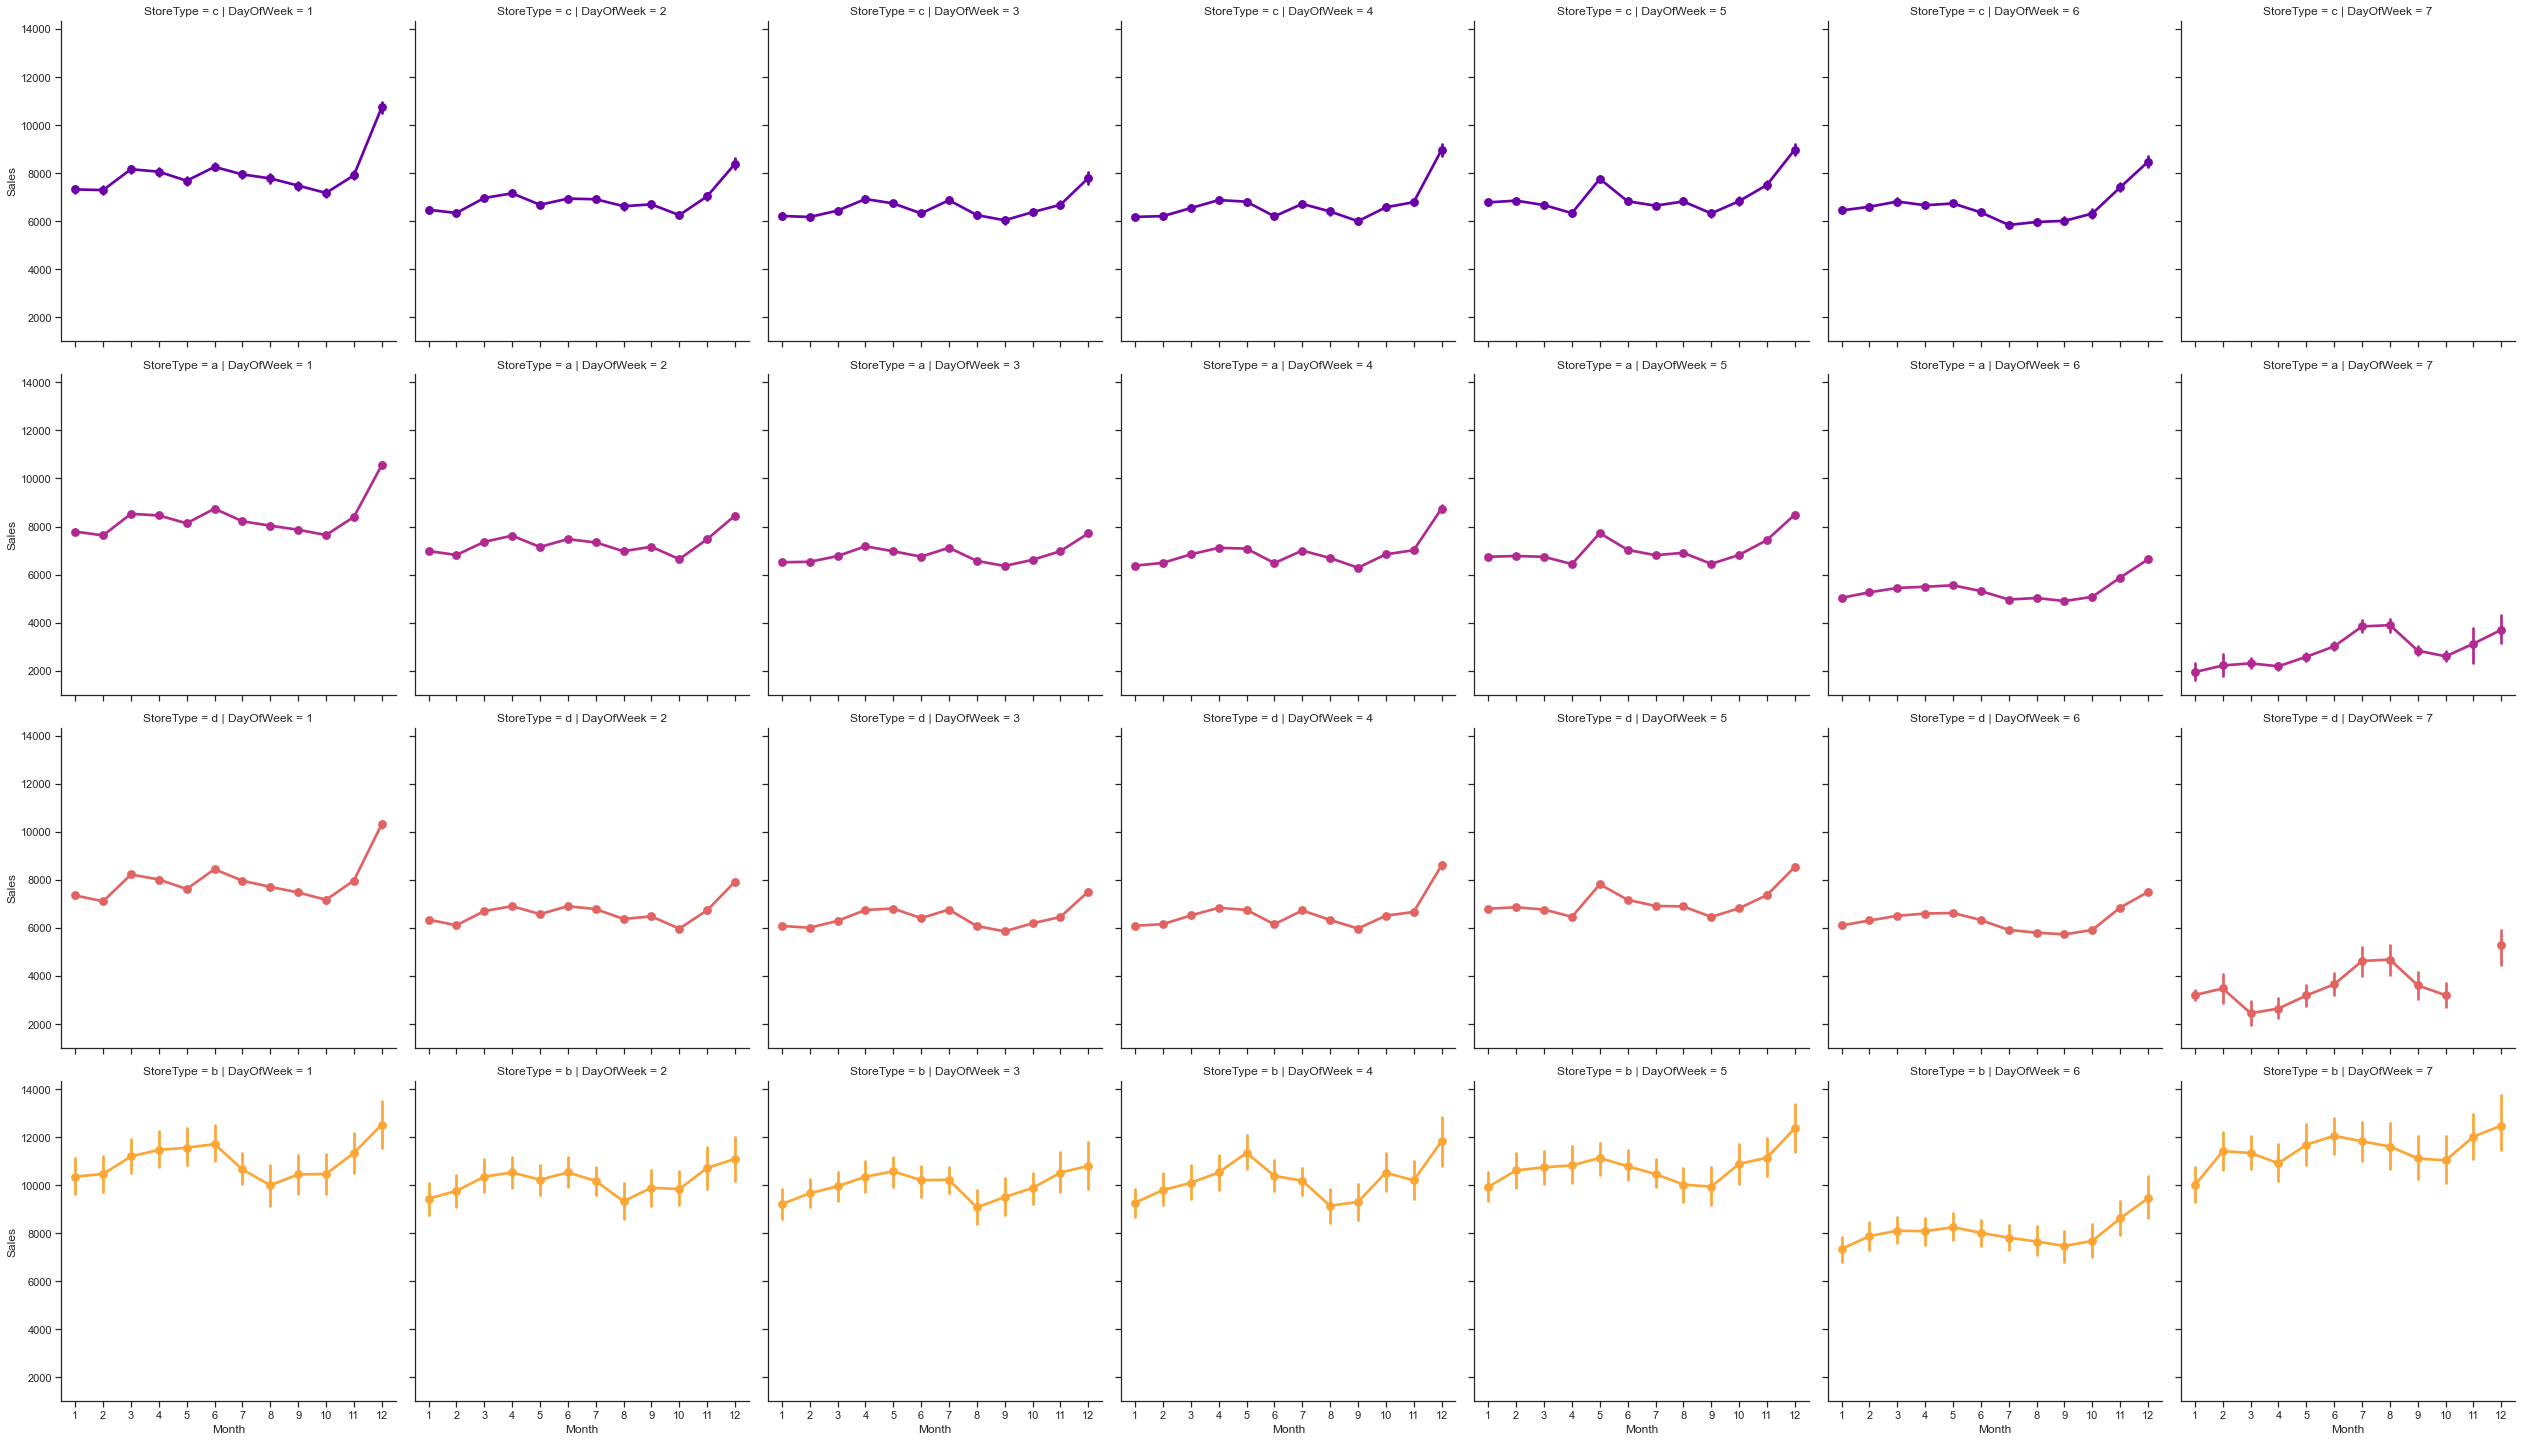

In [57]:
# customers
sns.factorplot(data = data, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               color = c) 

We see that stores of StoreType C are all closed on Sundays, whereas others are most of the time opened.  stores of StoreType D are closed on Sundays only from October to December.

In [58]:
# stores which are opened on Sundays
data[ (data.DayOfWeek == 7)]['Store'].unique(),len(data[ (data.DayOfWeek == 7)]['Store'].unique())

(array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
         433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
         733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
       dtype=int64),
 33)

Among 1115 stores only 33 stores open in sunday but still the total sale is high in compare to other day.

### Sales trend w.r.t Promo in each day of week

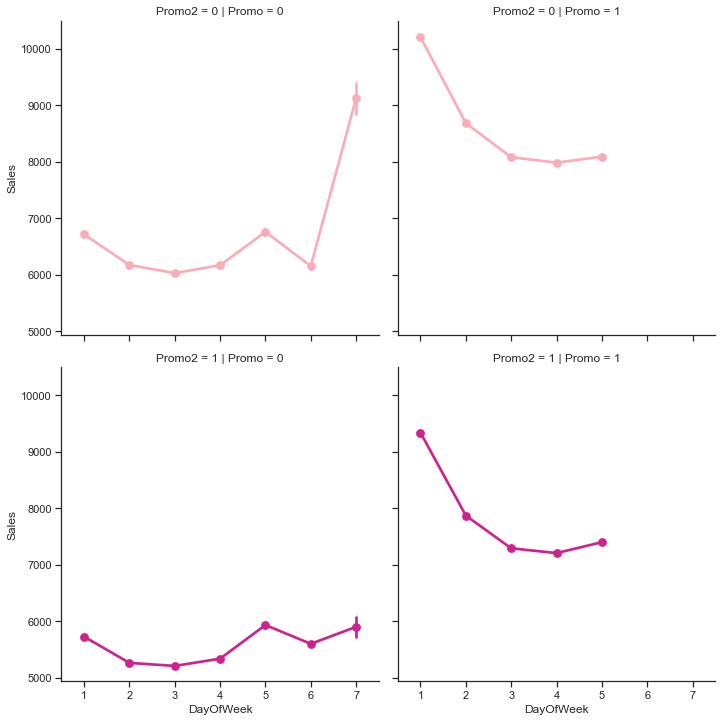

In [59]:
# sale per customer trends
sns.factorplot(data = data, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu') 

Insgihts:
    
    Sales tend to peak on Sunday .  StoreType C doesn't work on Sundays. So it is mainly from StoreType A, B and D.
     stores that run the promotion tend to make most of the Sales on Monday.
     Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

### Sales trend w.r.t Promo in each year

[]

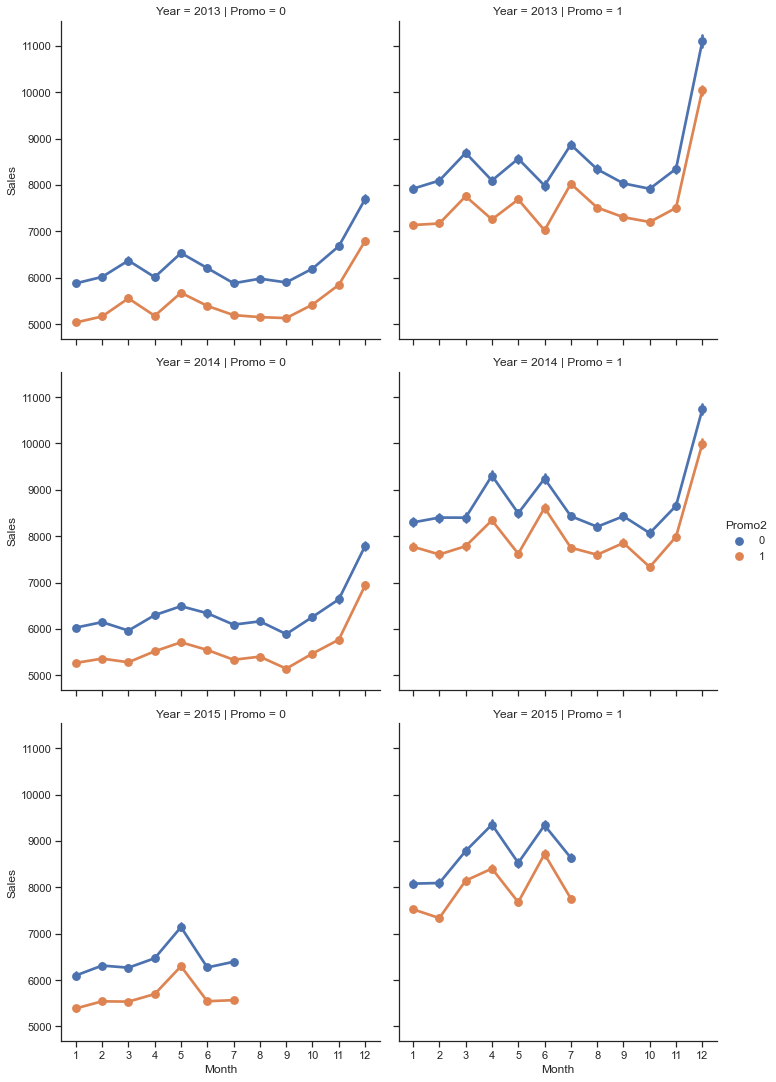

In [60]:
sns.factorplot(data = data, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year")
plt.plot()

### Sales trend over DayOfWeek w.r.t promo

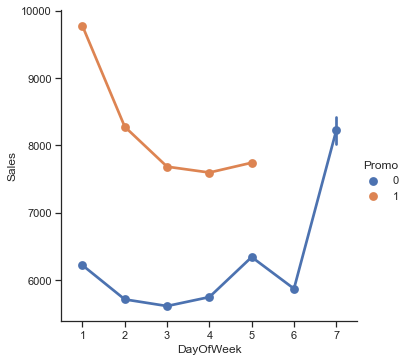

In [61]:
# Sales trend over days
sns.factorplot(data = data, x = "DayOfWeek", y = "Sales", hue = "Promo")
plt.show()

### Sales trend over DayOfWeek w.r.t promo & promo2

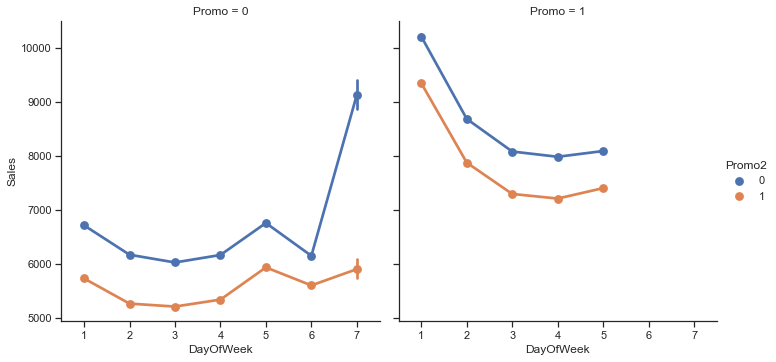

In [62]:
# checking Promo2 
sns.factorplot(data = data, x = "DayOfWeek", y = "Sales", hue = "Promo2", col="Promo")
plt.show()



Observations

    There is no promotional offers on weekend i.e., Saturday and Sunday (Store wants to gain maximum profit)
    There is sharp increase in the sales on Sunday.
    Maximum sale happens on Monday with promotional offer
    In present of Promo2 overall sale is decreasing



### Competition Distance

In [63]:
df_dist=data.groupby('Store')['CompetitionDistance'].median().reset_index().sort_values('CompetitionDistance',ascending=False)
df_dist 

,Store,CompetitionDistance
452,453,75860.0
121,122,58260.0
800,801,48330.0
109,110,46590.0
746,747,45740.0
...,...,...
1007,1008,30.0
515,516,20.0
290,291,NaN
621,622,NaN


Text(0.5, 1.0, 'Competition Distance Vs Average Sales')

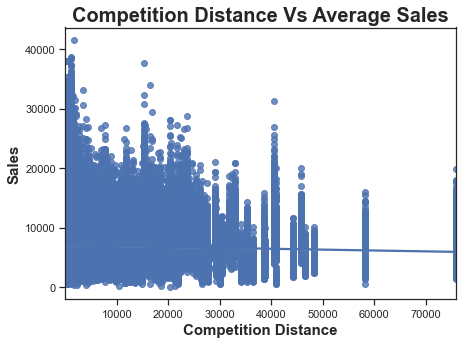

In [64]:
# regplot for competition distance vs sale
plt.figure(figsize=(7,5))
ax=sns.regplot(data=data,x='CompetitionDistance',y='Sales')
ax.set_xlabel('Competition Distance',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Competition Distance Vs Average Sales",fontsize=20,fontdict={"weight": "bold"})

non linear Relationship between Sales and competition Distance.

Competition Distance is the distance of other store with the Rossmann Store.We can see that when the competition disance is low then the sales is more.This is counter intutive that if there are competitors aroud you then your sales is also more.


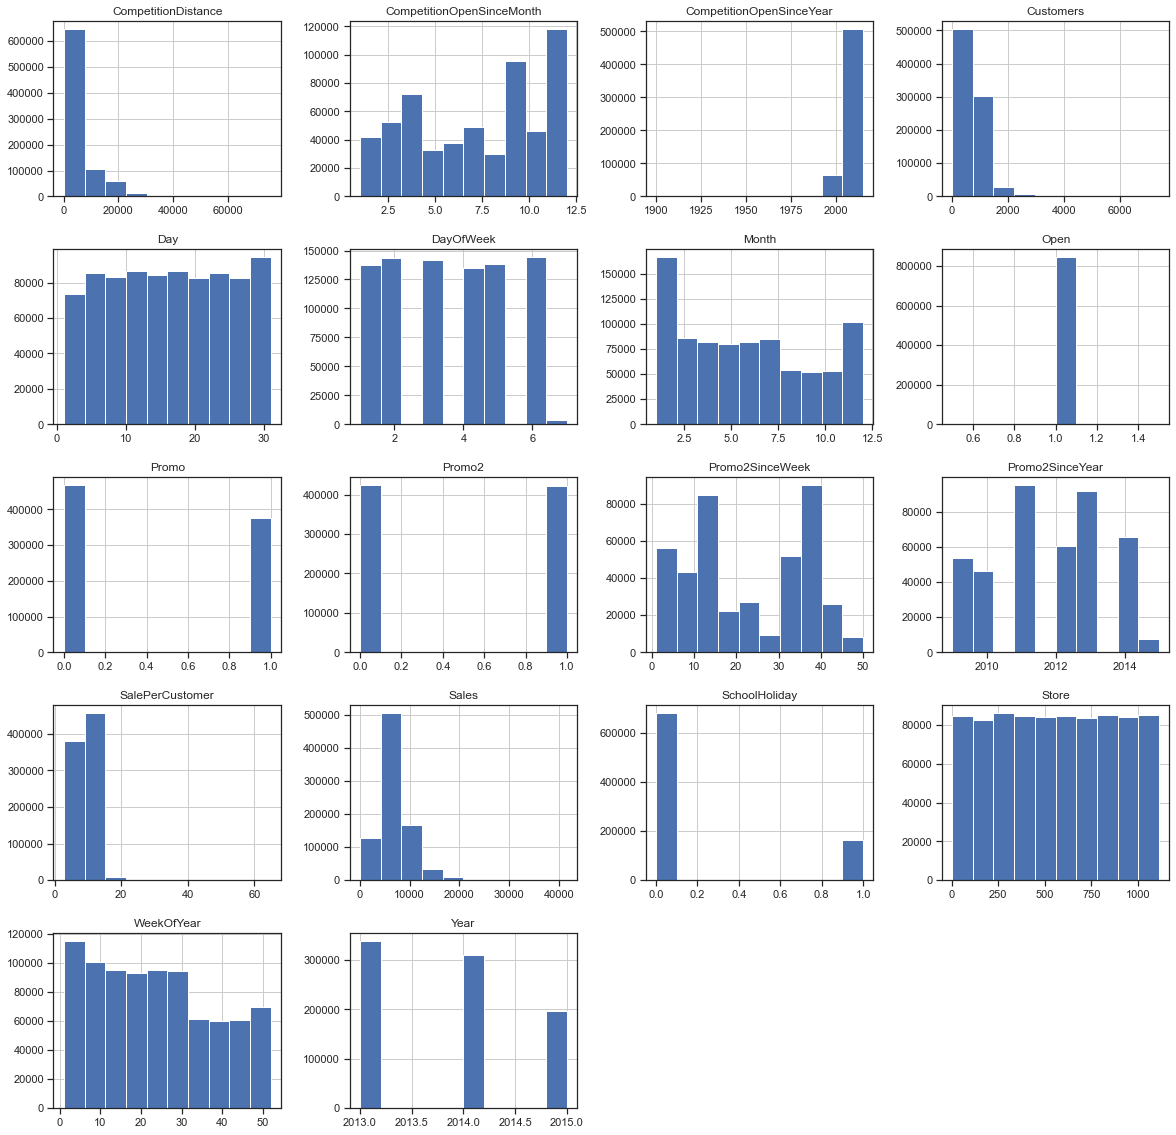

In [65]:
#plotting the given dataset on histogram
data.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

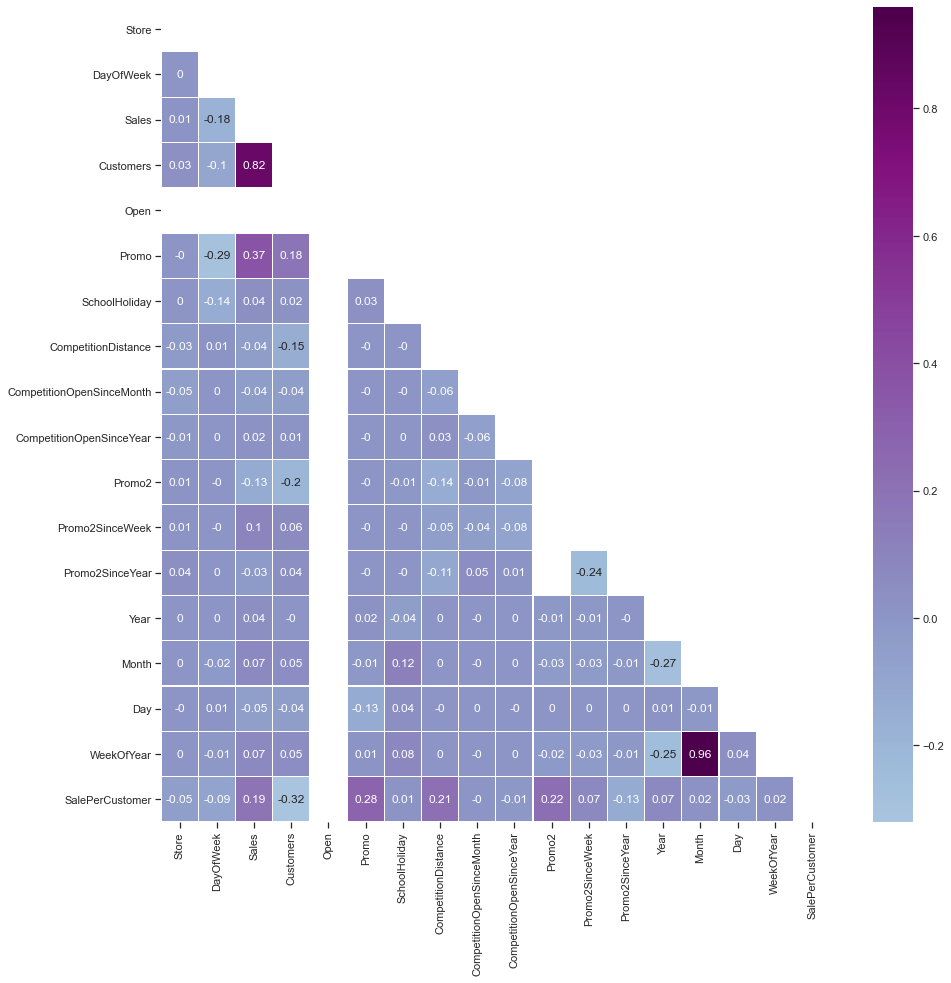

In [66]:
#To check correlation among features
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr().round(2),cmap = "BuPu",mask=mask,linewidth=0.2,annot=True,center=0)

Insights:
    
    a strong positive correlation between the amount of Sales and Customers .
    
    .ifstore continues a consecutive promotion (Promo2) the number of Customers and Sales seems to stay the same or even  decreasewhich is described by the pale negative correlation on the heatmap. 
    
     negative correlation is observed between the presence of the promotion in the store and the day of a week.


### Summary of insights got from EDA

    The most selling and crowded StoreType is A.

    The best "Sale per Customer" is StoreType D .  In this store types customers prefer buying more but less often.

    Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for small things. 

    Customers tends to buy more on Mondays when there's one promotion running (Promo) and on Sundays when there is no promotion at all .

    Promo2 alone doesn't seem to be made any significant change in the Sales amount.



In [67]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,9.482883
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31,9.194139
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29,31,9.143403
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28,31,8.948214
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27,31,9.970588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,2013-01-07,6905,471,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,7,2,14.660297
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,5,1,14.073746
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,4,1,13.926380
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,3,1,14.323333


## Pre-processing

### missing values treatment 

### competition_distance:

I'll assume that if the value is missing it's because there'no competitor close to the store.

In [68]:
# missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


 #### this information is simply missing from the data. No particular pattern observed.maybe null values indicates that there're no competitors next.

### CompetitionOpenSinceMonth and CompetitionOpenSinceYear:

In [69]:
# missing values in CompetitionOpenSinceMonth
store[pd.isnull(store.CompetitionOpenSinceMonth)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [70]:
# missing values in CompetitionOpenSinceMonth
store[pd.isnull(store.CompetitionOpenSinceYear)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**there's no information about it,why missing values occured in the competition, CompetitionOpenSinceMonth and CompetitionOpenSinceYear.**

**so filling null values with 0**


### Promo2SinceWeek & Promo2SinceYear

If there are missing values in these columns, maybe it's because the store is not participating in promo2. So, we'll fill it out with the present date.


In [71]:
# no promo = no information about the promo?
no_promo=store[pd.isnull(store.Promo2SinceWeek)]
no_promo

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [72]:
 no_promo[(no_promo['Promo2']!=0)  ] .shape

(0, 10)

**if there's no Promo2 ,stores are not participating in promotions ,so need of Promo2SinceWeek,Promo2SinceYear,PromoInterval**

# replace NA's by 0

In [73]:
# replace NA's by 0
data.fillna(0, inplace = True)

In [74]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31,9.482883
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30,31,9.194139
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29,31,9.143403
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28,31,8.948214
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27,31,9.970588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,2013-01-07,6905,471,1,1,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,7,2,14.660297
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,5,1,14.073746
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,4,1,13.926380
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,3,1,14.323333


### Change Data Types

In [75]:
# Converting column into integer
int_col = ["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
for i in int_col:
    data[i] = data[i].astype('int64')

### Checking outliers using boxplot

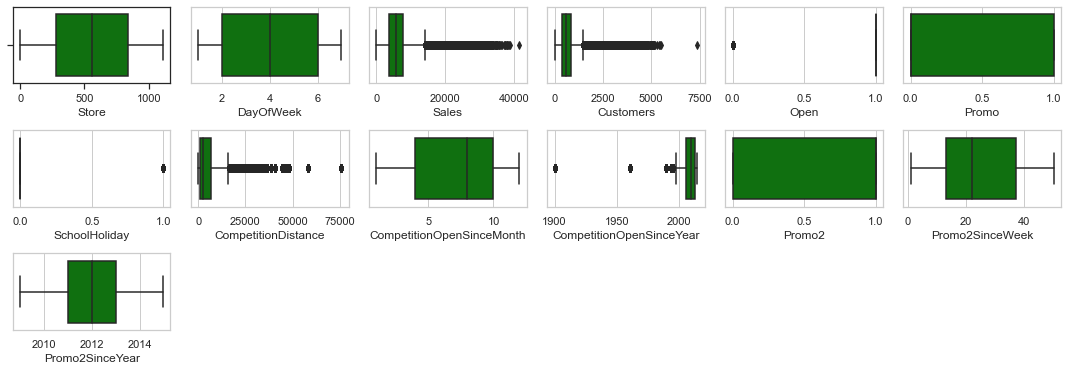

In [76]:
#outlier Detection using box plot
l =numerical.columns.values
plt.figure(figsize=(15,10))
for i in range(0,len(l)):
    plt.subplot(6,6,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(numerical[l[i]],color='green',orient='v')
    plt.tight_layout()

In [77]:
#outlier columns
outlier_data = data[['Sales','Customers','CompetitionDistance']]

## Stationary check of Time Series Store wise



Stationary:

A time series is stationary if the statistical characteristics doen't change over time period. If so, it would be easy to predict the future because the mean, variance and covariance is present in our hands. In order to make the series stationary, different transformation approaches can be maintained.

In [78]:
# defining function to select store 
def store_selection(store_id, data):
    data = data
    store = data[data.Store==store_id].iloc[:,1:]
    return store

In [79]:
from statsmodels.tsa.stattools import adfuller

# Defining the function to calculate Stationary
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(key, value)

In [80]:
# Checking Stationary in each store
store_1 = store_selection(1, data)
store_1.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,SalePerCustomer
0,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,31,31,9.482883
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,30,31,9.194139
2,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,29,31,9.143403
3,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,28,31,8.948214
4,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,27,31,9.970588


In [81]:
test_stationarity(store_1.Sales)

Results of Dickey-Fuller Test:
ADF Statistic: -5.412786
p-value: 0.000003
Critical Values:
1% -3.4389045244994096
5% -2.8653156040031176
10% -2.5687805115003


In [82]:
# Creating an array with p values for all the stores
list_sta = []
for store in train.Store.unique():
    result = adfuller(train[train.Store == store]['Sales'], autolag='AIC')
    list_sta.append(result[1])

In [83]:
# Checking the average mean of probablity to check the Stationary of data
list_sta = pd.Series(list_sta)
print ('mean p value',list_sta.mean())
res=list_sta.mean()


if res <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

mean p value 0.011678896214483068
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


#### Observation

    Mean p value is 0.0116
    P Value lesser than 0.05 indicates data is Stationary 

### Feature Engineering

#### Create new variable "AvgSales" 

Avg Sales and Customer Data Set

In [84]:
avg_sales_df =pd.DataFrame(data.groupby('Store')['Customers','Sales'].mean())
avg_sales_df.columns = ['Avg_customers','Avg_sales']
avg_sales_df

,Avg_customers,Avg_sales
Store,,
1,564.049936,4759.096031
2,583.998724,4953.900510
3,750.077022,6942.568678
4,1321.752551,9638.401786
5,537.340180,4676.274711
...,...,...
1111,451.711168,5251.702182
1112,838.608472,10236.577664
1113,717.029337,6627.859694


In [85]:
data = pd.merge(data, avg_sales_df, on="Store", how='left')

In [86]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,SalePerCustomer,Avg_customers,Avg_sales
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,31,31,9.482883,564.049936,4759.096031
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,30,31,9.194139,564.049936,4759.096031
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,29,31,9.143403,564.049936,4759.096031
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,28,31,8.948214,564.049936,4759.096031
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0,2015,7,27,31,9.970588,564.049936,4759.096031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1115,1,2013-01-07,6905,471,1,1,0,1,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,7,2,14.660297,432.629962,6302.469910
844334,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,5,1,14.073746,432.629962,6302.469910
844335,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,4,1,13.926380,432.629962,6302.469910
844336,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",2013,1,3,1,14.323333,432.629962,6302.469910


## Feature Reduction

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  object        
 8   SchoolHoliday              844338 non-null  int64         
 9   StoreType                  844338 non-null  object        
 10  Assortment                 844338 non-null  object        
 11  CompetitionDistance        844338 non-null  float64 

### after droping closed stores ,no need of "Open",because it has only one value ie 1,so droping it 

In [88]:
data = data.drop('Open', axis=1)

** also dont need PromoInterval   feature ,it doesnt help in model building ,so droping it**

In [89]:
data = data.drop('PromoInterval', axis=1)

In [90]:
data

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,SalePerCustomer,Avg_customers,Avg_sales
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9,2008,0,0,0,2015,7,31,31,9.482883,564.049936,4759.096031
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9,2008,0,0,0,2015,7,30,31,9.194139,564.049936,4759.096031
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9,2008,0,0,0,2015,7,29,31,9.143403,564.049936,4759.096031
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9,2008,0,0,0,2015,7,28,31,8.948214,564.049936,4759.096031
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9,2008,0,0,0,2015,7,27,31,9.970588,564.049936,4759.096031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1115,1,2013-01-07,6905,471,1,0,1,d,c,5350.0,0,0,1,22,2012,2013,1,7,2,14.660297,432.629962,6302.469910
844334,1115,6,2013-01-05,4771,339,0,0,1,d,c,5350.0,0,0,1,22,2012,2013,1,5,1,14.073746,432.629962,6302.469910
844335,1115,5,2013-01-04,4540,326,0,0,1,d,c,5350.0,0,0,1,22,2012,2013,1,4,1,13.926380,432.629962,6302.469910
844336,1115,4,2013-01-03,4297,300,0,0,1,d,c,5350.0,0,0,1,22,2012,2013,1,3,1,14.323333,432.629962,6302.469910


### Encoding

In [91]:
# to numerical
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
data.Assortment.replace(mappings, inplace = True)
data.StoreType.replace(mappings, inplace = True)
data.StateHoliday.replace(mappings, inplace = True)

In [92]:
data

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,SalePerCustomer,Avg_customers,Avg_sales
0,1,5,2015-07-31,5263,555,1,0,1,3,1,1270.0,9,2008,0,0,0,2015,7,31,31,9.482883,564.049936,4759.096031
1,1,4,2015-07-30,5020,546,1,0,1,3,1,1270.0,9,2008,0,0,0,2015,7,30,31,9.194139,564.049936,4759.096031
2,1,3,2015-07-29,4782,523,1,0,1,3,1,1270.0,9,2008,0,0,0,2015,7,29,31,9.143403,564.049936,4759.096031
3,1,2,2015-07-28,5011,560,1,0,1,3,1,1270.0,9,2008,0,0,0,2015,7,28,31,8.948214,564.049936,4759.096031
4,1,1,2015-07-27,6102,612,1,0,1,3,1,1270.0,9,2008,0,0,0,2015,7,27,31,9.970588,564.049936,4759.096031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1115,1,2013-01-07,6905,471,1,0,1,4,3,5350.0,0,0,1,22,2012,2013,1,7,2,14.660297,432.629962,6302.469910
844334,1115,6,2013-01-05,4771,339,0,0,1,4,3,5350.0,0,0,1,22,2012,2013,1,5,1,14.073746,432.629962,6302.469910
844335,1115,5,2013-01-04,4540,326,0,0,1,4,3,5350.0,0,0,1,22,2012,2013,1,4,1,13.926380,432.629962,6302.469910
844336,1115,4,2013-01-03,4297,300,0,0,1,4,3,5350.0,0,0,1,22,2012,2013,1,3,1,14.323333,432.629962,6302.469910


###  Building Model

In [103]:
X= data.drop(columns = ['Sales','Date'], axis=1)
y= data['Sales']

In [104]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
# 30% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=22)

In [105]:
X_train

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,SalePerCustomer,Avg_customers,Avg_sales
519434,687,2,712,1,0,1,4,3,2770.0,0,0,0,0,0,2014,10,7,41,11.554775,734.383825,8372.464698
763808,1009,2,498,1,0,0,1,1,230.0,7,2004,1,10,2014,2013,2,5,6,12.421687,458.149518,4772.184887
231012,307,1,233,0,0,0,1,1,18660.0,9,2002,0,0,0,2014,1,13,3,6.974249,307.805627,2703.736573
337362,446,6,335,0,0,0,1,1,340.0,10,2000,1,31,2013,2014,2,8,6,8.235821,635.056483,4932.165597
6656,9,3,581,1,0,0,1,3,2030.0,8,2000,0,0,0,2014,4,2,14,11.791738,579.816431,6562.337612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219638,292,5,748,1,0,0,1,1,1100.0,6,2009,0,0,0,2013,8,30,35,7.951872,706.522193,5774.090078
120166,161,4,739,0,0,0,1,3,2970.0,3,2005,0,0,0,2015,6,11,24,8.658999,819.218228,7252.598203
549220,727,2,434,0,0,0,1,1,2050.0,3,2007,0,0,0,2014,5,13,20,9.048387,452.833547,4529.290653
162752,217,2,633,1,0,0,3,1,3150.0,0,0,0,0,0,2013,2,19,8,6.829384,642.880102,4700.887755


In [95]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost                          import XGBRegressor
from catboost                         import CatBoostRegressor
from lightgbm                         import LGBMRegressor

In [109]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),RandomForestRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor','RandomForestRegressor']
mse_list=[]
rmse_list = []
r2_list=[]
mae_list=[]

In [110]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    mse_list.append(MSE)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    r2=r2_score(y_valid, y_pred)
    r2_list.append(r2)
    mae=mean_absolute_error(y_valid,y_pred)
    mae_list.append(mae)    

In [111]:
evaluation = pd.DataFrame({'Model': names,
                           'mse':mse_list,
                           'RMSE': rmse_list,
                         'r2':r2_list,
                         'mae':mae_list})
evaluation

,Model,mse,RMSE,r2,mae
0,Linear Regression,361640.516214,601.365543,0.962419,402.052803
1,Ridge Regression,361777.379550,601.479326,0.962405,402.164590
2,Lasso Regression,362043.001343,601.700093,0.962378,401.802150
3,K Neighbors Regressor,408797.360279,639.372630,0.957519,447.853884
4,Decision Tree Regressor,5119.632510,71.551607,0.999468,19.113746
5,RandomForestRegressor,1851.324881,43.027025,0.999808,6.261761
